In [1]:
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm
import cv2

In [2]:
# import labels
labels = pd.read_csv("../Data/Data_Gabon/data_training_extra_Labels_labels_clean.csv")
# create list of all labels
label_list = []
for label in labels['species'].unique():
    label_list.append(label)

In [3]:
label_list[1]

'Blank'

In [4]:
labels['species'][3]

'Blank'

In [5]:
f = "0000001.jpg"
test = label_list.index(labels['species'][labels["uniqueName"] == f][0])

In [6]:
print(labels[labels["uniqueName"] == "0000004.jpg"]['species'].iloc[0])

Blank


In [42]:
class myanmarImg():
    # import labels
    labels = pd.read_csv("../Data/Data_Gabon/data_training_extra_Labels_labels_clean.csv")
    # create list of all labels
    label_list = []
    for label in labels['species'].unique():
        label_list.append(label)
    
    IMG_SIZE = 50
    LINK = "../Data/Data_gabon/data_training_rescaled_extra"
    training_data = []
    count = {}
    
    # add all labels
    for label in label_list:
        count[label] = 0
    

    def make_training_data(self, images):
        counter = 0
        for f in tqdm(os.listdir(self.LINK)):
            counter += 1
            if counter < images:
                try:
                    path = os.path.join(self.LINK, f)
                    img = cv2.imread(path, cv2.IMREAD_COLOR)
#                     img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))

                    label_index = self.label_list.index(self.labels['species'][self.labels["uniqueName"] == f].iloc[0])
                    self.training_data.append([np.array(img), label_index])

                    # count the images
                    self.count[self.label_list[label_index]] += 1
                except Exception as e:
                    print(str(e))
            else:
                break
            
        np.random.shuffle(self.training_data)
        print(self.count)

        return self.training_data, self.count, label_list

In [43]:
myanmarImg = myanmarImg()
train_data, count, label_list = myanmarImg.make_training_data(1000)

  3%|▎         | 9999/348329 [16:35<9:21:08, 10.05it/s] 

{'Human': 2703, 'Blank': 3050, 'Elephant_African': 2677, 'Hog_Red_River': 421, 'Buffalo_African': 1026, 'Leopard_African': 79, 'Monkey': 43, 'Duiker_Blue': 0, 'Duiker_Red': 0, 'Porcupine_Brush_Tailed': 0, 'Rodent': 0, 'Squirrel': 0, 'Rat_Giant': 0, 'Guineafowl_Crested': 0, 'Duiker_Yellow_Backed': 0, 'Guineafowl_Black': 0, 'Mongoose': 0, 'Rail_Nkulengu': 0, 'Mammal_Other': 0, 'Chimpanzee': 0, 'Bird': 0, 'Genet': 0, 'Gorilla': 0, 'Pangolin': 0, 'Mongoose_Black_Footed': 0, 'Mandrillus': 0, 'Civet_African_Palm': 0, 'Chevrotain_Water': 0, 'Cat_Golden': 0}


Elephant_African


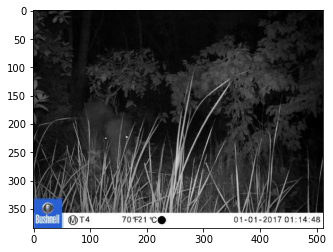

Elephant_African


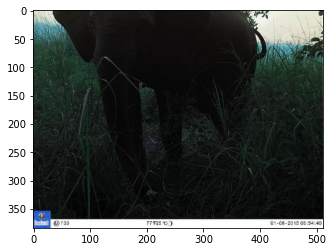

Elephant_African


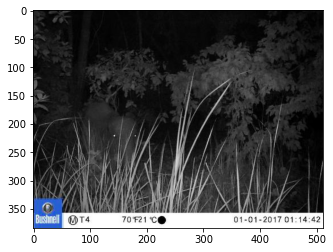

Elephant_African


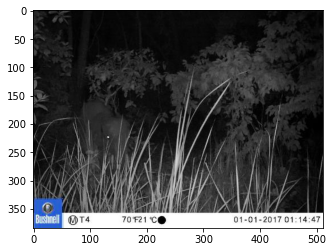

Elephant_African


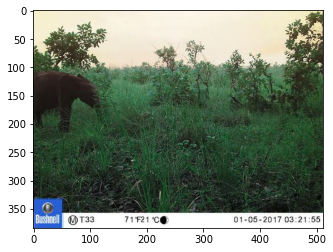

Elephant_African


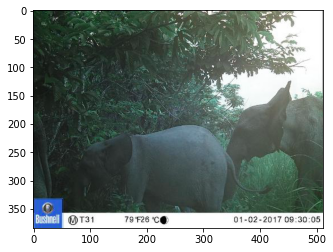

Elephant_African


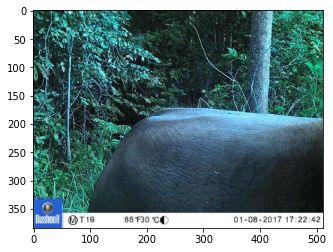

Elephant_African


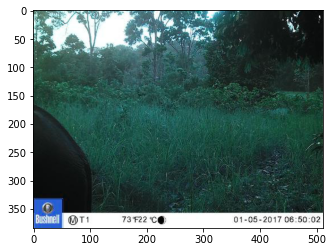

Elephant_African


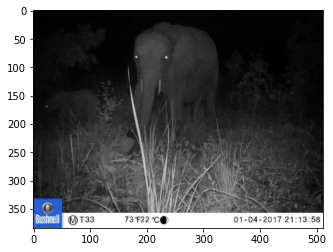

Elephant_African


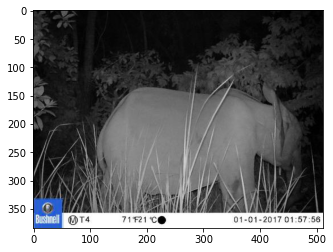

In [40]:
count = 0
for i in range(len(train_data)):
    if label_list[train_data[i][1]] == 'Elephant_African' and count < 10:
        plt.imshow(train_data[i][0], cmap="gray")
        print(label_list[train_data[i][1]])
        plt.show()
        count+=1